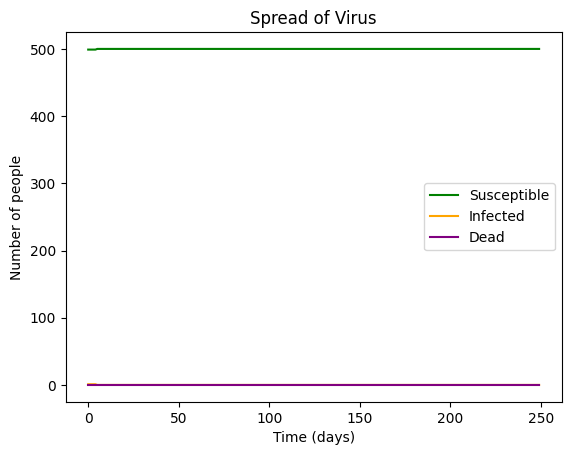

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Definição da função que retornará valores para serem printados

def simulate_virus_spread(N, I0, D0, R0, beta, gamma, mu, t_max):
    S = N - I0 - D0 - R0
    I = I0
    R = R0
    D = D0
    
    susceptible = [S]
    infected = [I]
    dead = [D]
    
    for t in range(1, t_max):
        # Certo grau de aleatorieadade
        new_infections = np.random.poisson(beta * S * I / N)
        new_recoveries = np.random.poisson(I * gamma)
        new_deaths = np.random.poisson(I * mu)
        
        S -= new_infections - new_deaths
        I += new_infections - new_recoveries - new_deaths
        D += new_deaths
        S += new_recoveries  # Pessoas que se recuperaram podem se reeinfectar novamente
        
        # População deve ficar sempre menor que a quantidade inicial de pessoas (sistema fechado)
        S = max(0, min(S, N))
        I = max(0, min(I, N))
        D = max(0, min(D, N))
        
        susceptible.append(S)
        infected.append(I)
        dead.append(D)
    
    return susceptible, infected, dead


N_pessoas = 500
Infectados, D0, R0 = 1, 0, 0
tax_infec, tax_rec, tax_mort = 0.17, 0.02, 0.001
t_max = 250

s, i, d = simulate_virus_spread(N_pessoas, Infectados,0,0, tax_infec, tax_rec, tax_mort, t_max)

# Plotagem do gráfico

plt.plot(range(t_max), s, label='Susceptible', color='green')
plt.plot(range(t_max), i, label='Infected', color='orange')
plt.plot(range(t_max), d, label='Dead', color='purple')

plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('Spread of Virus')

plt.legend()
plt.show()


Ao utilizar o método np.random.poisson(), introduzimos aleatoriedade nos eventos de infecção, recuperação e morte, permitindo simular diferentes cenários de propagação viral ao longo do tempo. Isso considera a variação natural dos processos de infecção e recuperação em uma população.

Na propagação do vírus, novas infecções, recuperações e mortes são eventos pouco frequentes, ocorrendo apenas em uma pequena parte da população em cada período. Além disso, esses eventos são independentes, ou seja, o número de infecções não depende do número de recuperações ou mortes anteriores.

Os parâmetros da distribuição de Poisson são ajustados com base nas taxas de infecção, recuperação e mortalidade. Nesse modelo, a taxa de infecção é calculada multiplicando a taxa de infecção (beta) pelo número de indivíduos suscetíveis (S) e infectados (I) em relação à população total (N). A média de novas infecções é estimada usando a distribuição de Poisson com esse parâmetro.

Da mesma forma, as taxas de recuperação e mortalidade são usadas para estimar a média de novas recuperações e mortes em cada intervalo de tempo. Essas taxas são multiplicadas pelo número de indivíduos infectados (I) para determinar os parâmetros correspondentes na distribuição de Poisson.

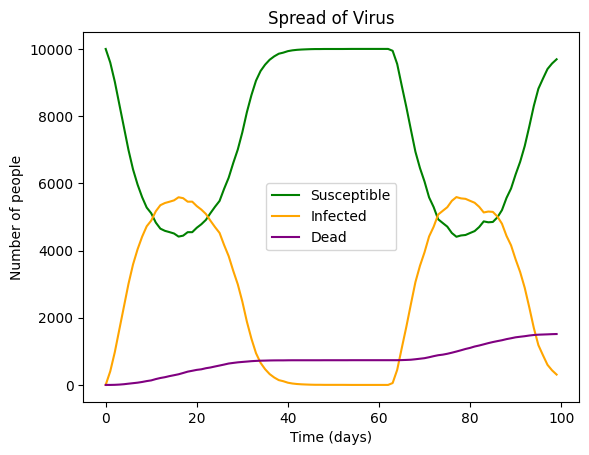

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_virus_spread(N, I0, D0, R0, beta, gamma, mu, t_max):
    S = N - I0 - D0 - R0
    I = I0
    R = R0
    D = D0
    
    susceptible = [S]
    infected = [I]
    dead = [D]
    
    for t in range(1, t_max):
        # Calculate the infection rate at the current time step
        infection_rate = beta *0.4*np.sin(t/10)  # Example: using a sine wave
        
        # Check if the infection rate is negative or NaN
        if np.isnan(infection_rate) or infection_rate < 0:
            infection_rate = 0
        
        # Certo grau de aleatoriedade
        new_infections = np.random.poisson(infection_rate * S)
        new_recoveries = np.random.poisson(I * gamma)
        new_deaths = np.random.poisson(I * mu)
        
        S -= new_infections - new_deaths
        I += new_infections - new_recoveries - new_deaths
        D += new_deaths
        S += new_recoveries  # Pessoas que se recuperaram podem se reeinfectar novamente
        
        # População deve ficar sempre menor que a quantidade inicial de pessoas (sistema fechado)
        S = max(0, min(S, N))
        I = max(0, min(I, N))
        D = max(0, min(D, S))
        
        susceptible.append(S)
        infected.append(I)
        dead.append(D)
    
    return susceptible, infected, dead


N_pessoas = 10000
Infectados, D0, R0 = 1, 0, 0
tax_infec, tax_rec, tax_mort = 0.91, 0.29, 0.006
t_max = 100

# Adjust the rate bounds and validate the rates
min_infec_tax = 0.01
max_infec_tax = 2
min_rec_tax = 0.001
max_rec_tax = 2
min_mort_tax = 0.0001
max_mort_tax = 0.01

tax_infec = np.clip(tax_infec, min_infec_tax, max_infec_tax)
tax_rec = np.clip(tax_rec, min_rec_tax, max_rec_tax)
tax_mort = np.clip(tax_mort, min_mort_tax, max_mort_tax)

# Validate the rates
if tax_rec >= tax_infec:
    tax_rec = tax_infec * 0.9

s, i, d = simulate_virus_spread(N_pessoas, Infectados, D0, R0, tax_infec, tax_rec, tax_mort, t_max)

# Plot the graph
plt.plot(range(t_max), s, label='Susceptible', color='green')
plt.plot(range(t_max), i, label='Infected', color='orange')
plt.plot(range(t_max), d, label='Dead', color='purple')

plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('Spread of Virus')

plt.legend()
plt.show()


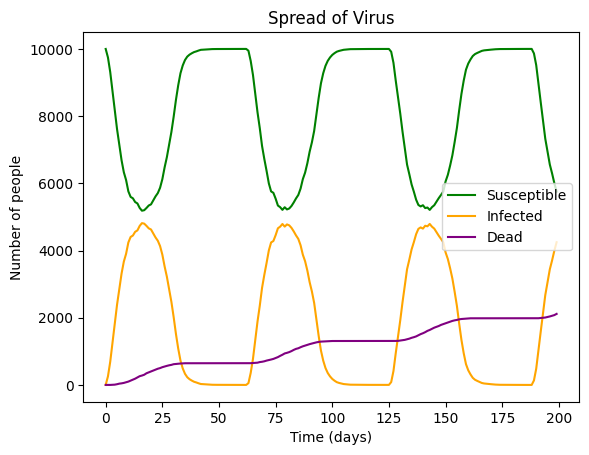

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_virus_spread(N, I0, D0, R0, beta, gamma, mu, t_max):
    S = N - I0 - D0 - R0
    I = I0
    R = R0
    D = D0
    
    susceptible = [S]
    infected = [I]
    dead = [D]
    
    for t in range(1, t_max):
        # Calculate the infection rate at the current time step
        infection_rate = beta *(0.3*np.sin(t/10))
        
        # Check if the infection rate is negative or NaN
        if infection_rate < 0:
            infection_rate = 0
        
        # Certo grau de aleatoriedade
        new_infections = np.random.poisson(infection_rate * S)
        new_recoveries = np.random.poisson(I * gamma)
        new_deaths = np.random.poisson(I * mu)
        
        S -= new_infections - new_deaths
        I += new_infections - new_recoveries - new_deaths
        D += new_deaths
        S += new_recoveries  # Pessoas que se recuperaram podem se reeinfectar novamente
        
        # População deve ficar sempre menor que a quantidade inicial de pessoas (sistema fechado)
        S = max(0, min(S, N))
        I = max(0, min(I, N))
        D = max(0, min(D, S))
        
        susceptible.append(S)
        infected.append(I)
        dead.append(D)
    
    return susceptible, infected, dead


N_pessoas = 10000
Infectados, D0, R0 = 1, 0, 0
tax_infec, tax_rec, tax_mort = 0.91, 0.29, 0.006
t_max = 200

# Adjust the rate bounds and validate the rates
min_infec_tax = 0.01
max_infec_tax = 2
min_rec_tax = 0.001
max_rec_tax = 2
min_mort_tax = 0.0001
max_mort_tax = 0.01

tax_infec = np.clip(tax_infec, min_infec_tax, max_infec_tax)
tax_rec = np.clip(tax_rec, min_rec_tax, max_rec_tax)
tax_mort = np.clip(tax_mort, min_mort_tax, max_mort_tax)

# Validate the rates
if tax_rec >= tax_infec:
    tax_rec = tax_infec * 0.9

s, i, d = simulate_virus_spread(N_pessoas, Infectados, D0, R0, tax_infec, tax_rec, tax_mort, t_max)

# Plot the graph
plt.plot(range(t_max), s, label='Susceptible', color='green')
plt.plot(range(t_max), i, label='Infected', color='orange')
plt.plot(range(t_max), d, label='Dead', color='purple')

plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('Spread of Virus')

plt.legend()
plt.show()
